In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_curve, auc, 
                           precision_recall_curve, roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('/home/sajjad/Desktop/42/ML/ML LAB/Kaggle_Competition/Dataset/train.csv')
print(df.describe())
df

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Check dataset structure
print("Dataset columns:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Po

In [4]:
threshold = 0.7  # 70% missing allowed

# Calculate fraction of missing values in each column
nan_ratio = df.isna().mean()

# Filter columns with >70% missing
cols_over_70_nan = nan_ratio[nan_ratio > threshold].index

print("Columns with more than 70% missing values:")
print(cols_over_70_nan.tolist())


Columns with more than 70% missing values:
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
df = df.drop(columns=cols_over_70_nan)


In [6]:
threshold = 0.5  # 70% missing allowed

# Calculate fraction of missing values in each column
nan_ratio = df.isna().mean()

# Filter columns with >70% missing
cols_over_50_nan = nan_ratio[nan_ratio > threshold].index

print("Columns with more than 70% missing values:")
print(cols_over_50_nan.tolist())


Columns with more than 70% missing values:
['MasVnrType']


In [7]:
df = df.drop(columns=cols_over_50_nan)

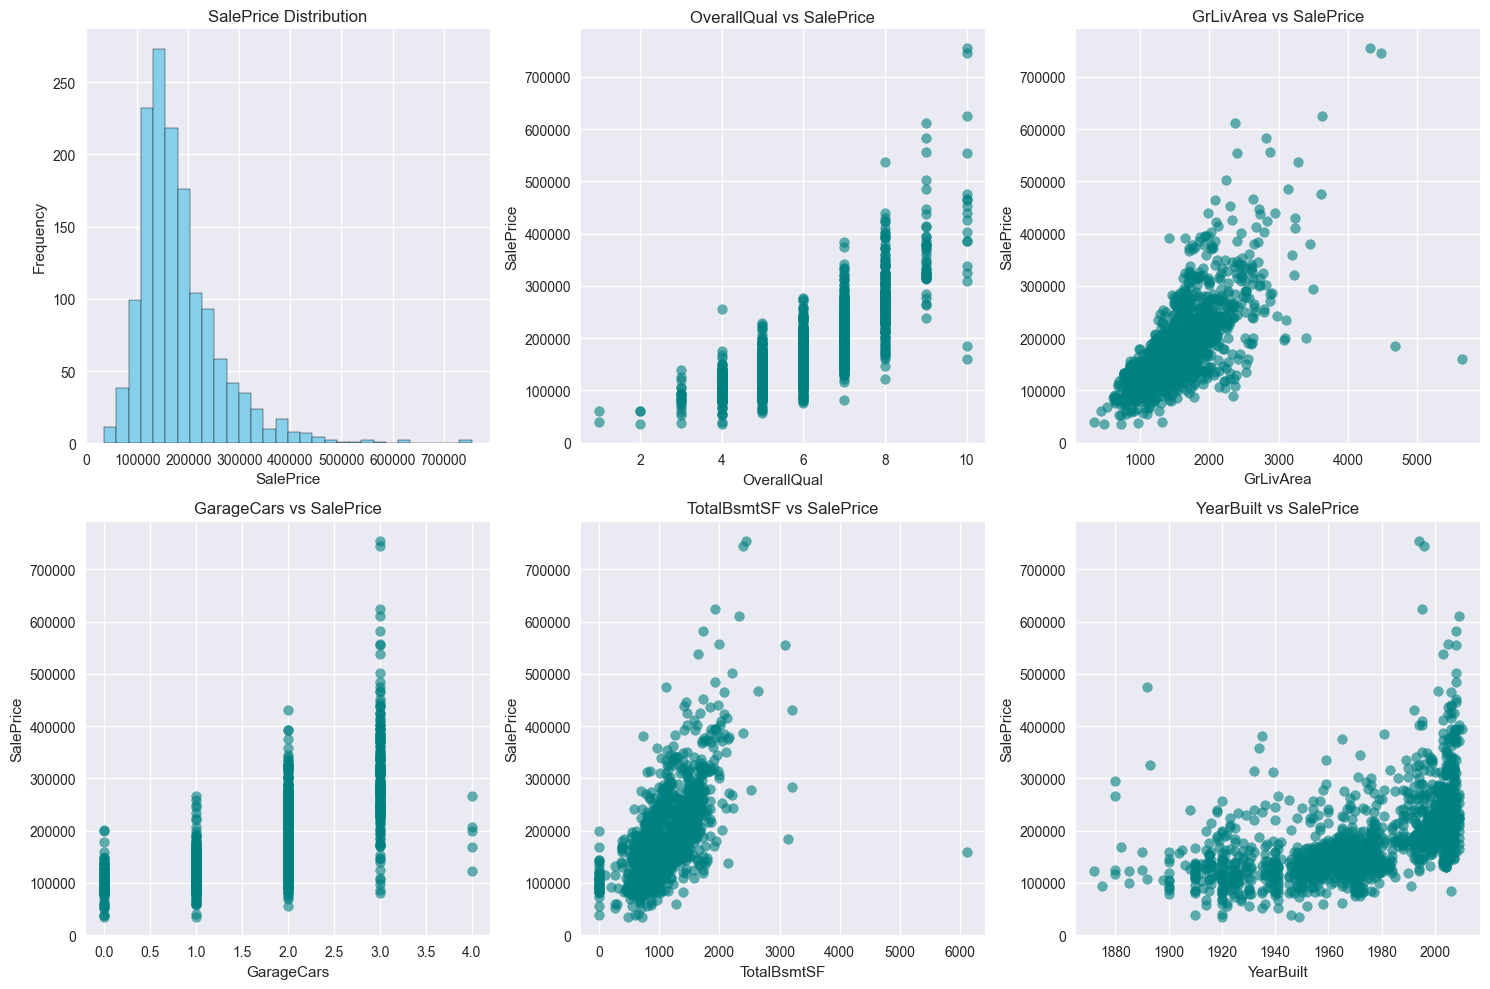

Number of samples: 1460
SalePrice range: 34,900 - 755,000
Average SalePrice: 180,921


In [8]:
# Visualize target distribution and key features
plt.figure(figsize=(15, 10))

# Target (SalePrice) distribution
plt.subplot(2, 3, 1)
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Key feature distributions
key_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

for i, feature in enumerate(key_features, 2):
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], df['SalePrice'], alpha=0.6, color='teal')
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

print(f"Number of samples: {len(df)}")
print(f"SalePrice range: {df['SalePrice'].min():,.0f} - {df['SalePrice'].max():,.0f}")
print(f"Average SalePrice: {df['SalePrice'].mean():,.0f}")


In [9]:
# Check for missing values and data types
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

print("\nData types:")
print(df.dtypes.value_counts())

Missing values per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

Total missing values: 1550

Data types:
object     38
int64      35
float64     3
Name: count, dtype: int64


## Handle missing values

In [10]:
#separate numeric and categorical column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

#handling strategy
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

#apply
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

#confirm
print(df.isnull().sum().sort_values(ascending=False).head(10))



Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
dtype: int64


In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,WD,Normal,175000.0
1456,1457.0,20.0,RL,85.0,13175.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,WD,Normal,210000.0
1457,1458.0,70.0,RL,66.0,9042.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,WD,Normal,266500.0
1458,1459.0,20.0,RL,68.0,9717.0,Pave,Reg,Lvl,AllPub,Inside,...,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,142125.0


In [12]:
from sklearn.preprocessing import LabelEncoder
# Encode features using LabelEncoder
encoders = {}  # Dictionary to store encoder for each column

for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder for later use

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,5,3,36,327,1,3,3,0,4,...,0,0,0,0,0,1,2,8,4,412
1,1,0,3,51,498,1,3,3,0,2,...,0,0,0,0,0,4,1,8,4,339
2,2,5,3,39,702,1,0,3,0,4,...,0,0,0,0,0,8,2,8,4,442
3,3,6,3,31,489,1,0,3,0,0,...,108,0,0,0,0,1,0,8,0,194
4,4,5,3,55,925,1,0,3,0,2,...,0,0,0,0,0,11,2,8,4,494


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the data (regression: no stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for models like linear regression, SVR, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Basic info
print(f"Original data shape: {X.shape}")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# Show target statistics instead of class counts
print(f"Training target - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Test target - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")

# Check scaling effect on features
print(f"\nBefore scaling - Mean: {X_train.values.mean():.3f}, Std: {X_train.values.std():.3f}")
print(f"After scaling - Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

# Feature-wise scaling summary
print(f"\nFeature scaling summary:")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0).mean():.6f}")


Original data shape: (1460, 75)
Training set: (1168, 75)
Test set: (292, 75)
Training target - Mean: 295.598, Std: 168.000
Test target - Mean: 281.753, Std: 176.289

Before scaling - Mean: 47.755, Std: 151.469
After scaling - Mean: -0.000, Std: 1.000

Feature scaling summary:
Mean of scaled features (should be ~0): -0.000000
Std of scaled features (should be ~1): 1.000000


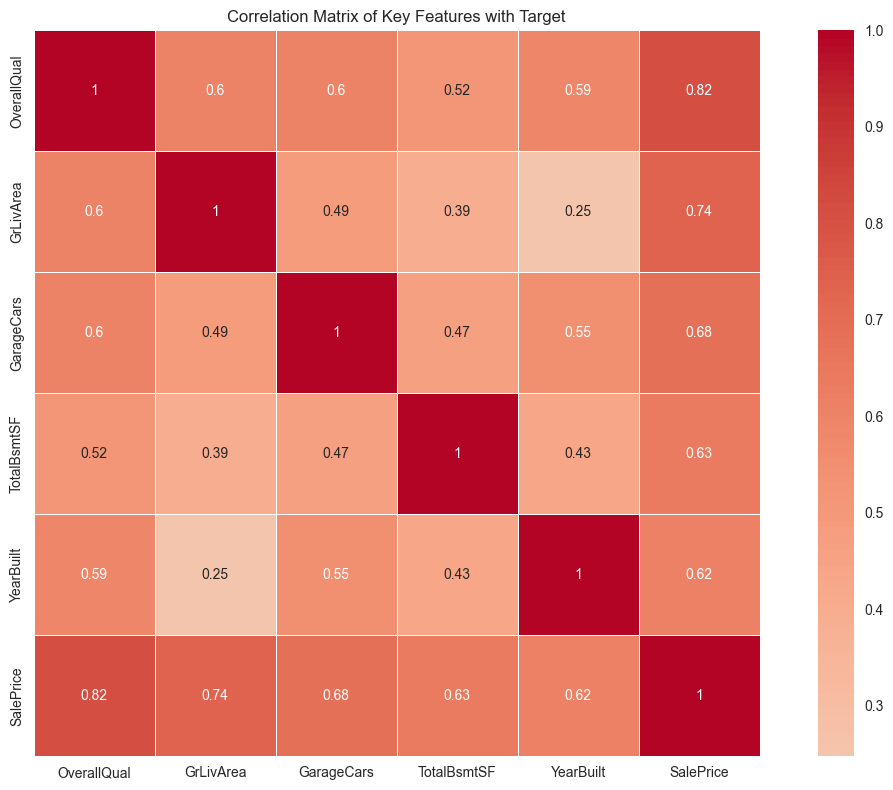

In [14]:
# Feature analysis - correlation heatmap of key features
key_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

plt.figure(figsize=(12, 8))
correlation_matrix = df[key_features + ['SalePrice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Key Features with Target')
plt.tight_layout()
plt.show()

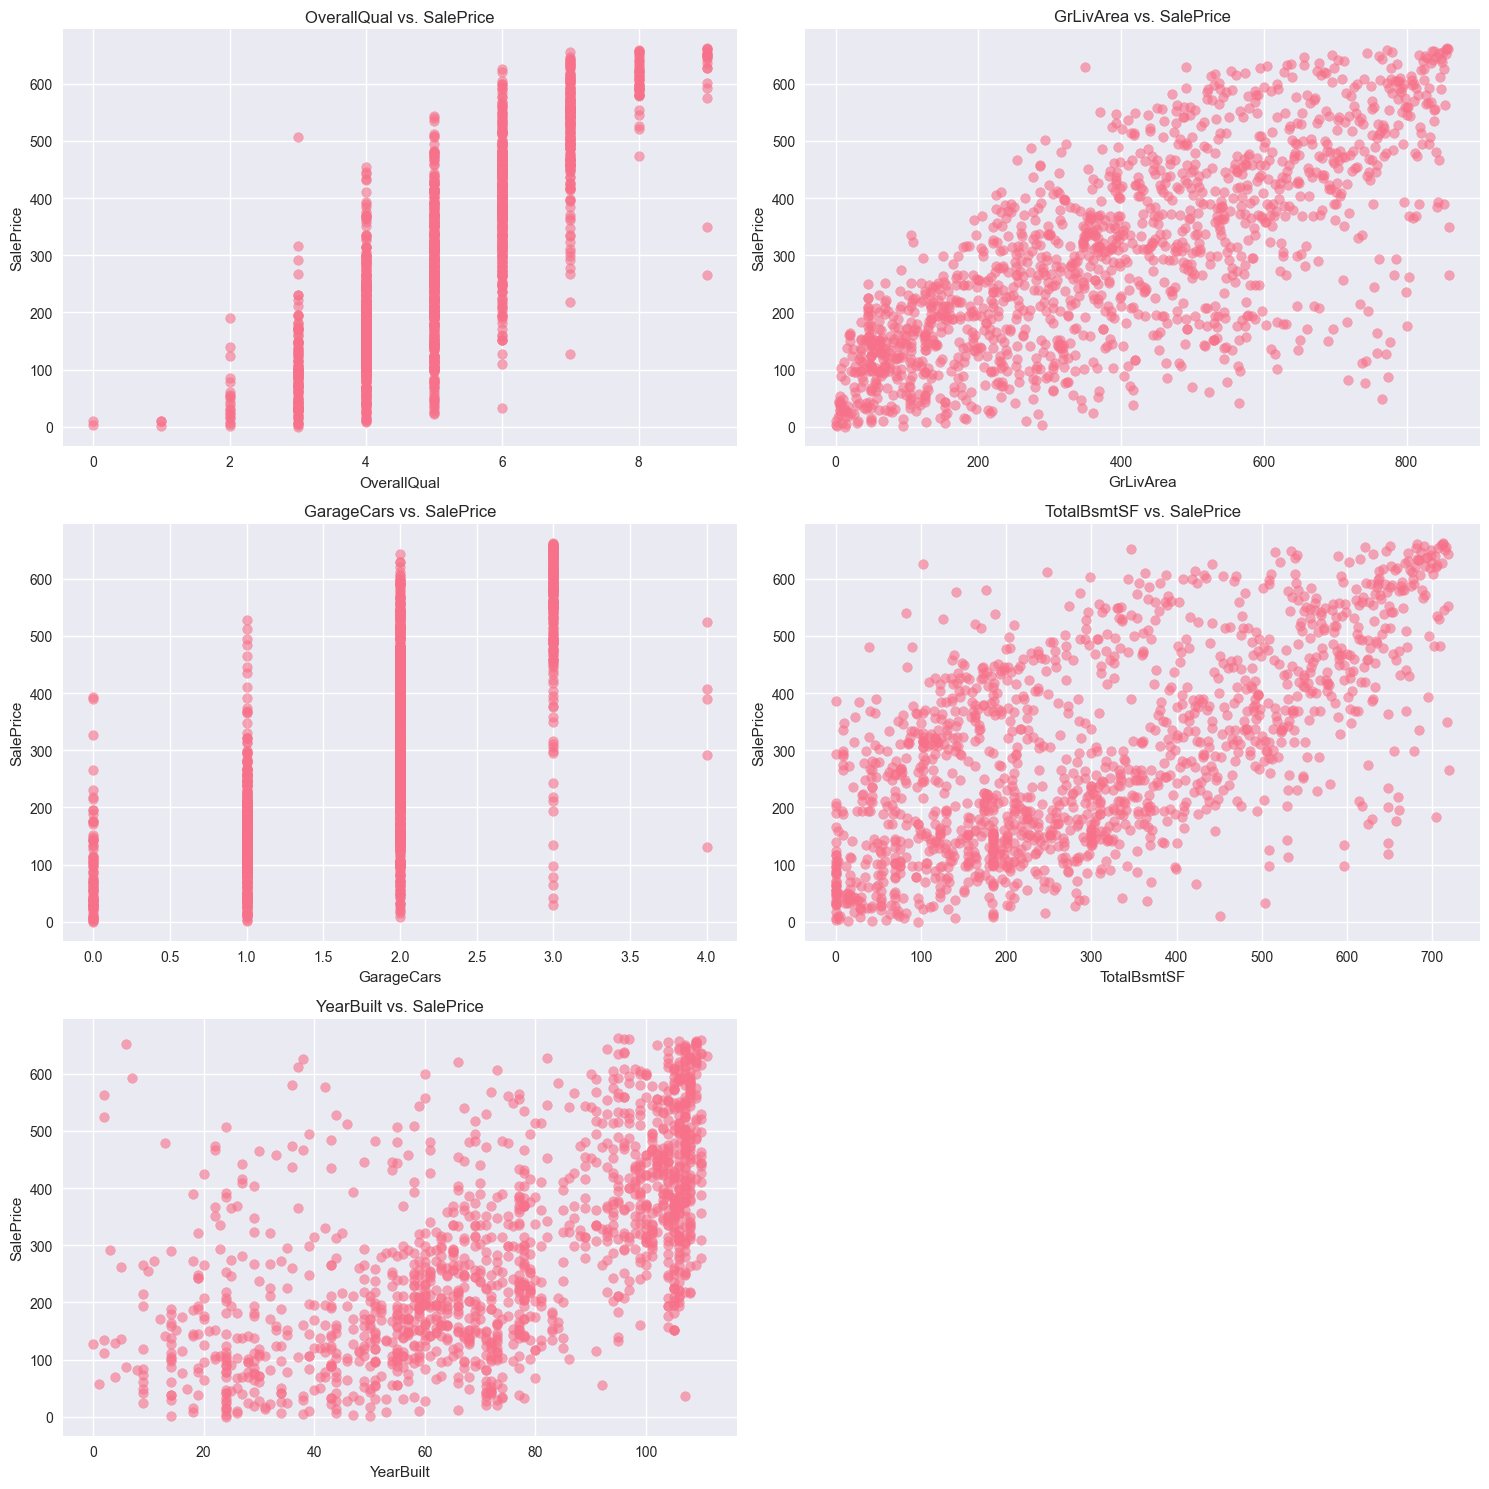

In [15]:
import matplotlib.pyplot as plt

# Features to visualize
features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    
    # Scatter plot: feature vs. target
    ax.scatter(df[feature], df['SalePrice'], alpha=0.6)
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{feature} vs. SalePrice')

# Remove empty subplot if features < 6
if len(features_to_plot) < len(axes):
    for j in range(len(features_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
train_r2 = rf_regressor.score(X_train, y_train)  # R² on training set
test_r2 = rf_regressor.score(X_test, y_test)    # R² on test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("🔹 Model Performance (Regression):")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


🔹 Model Performance (Regression):
Training R²: 0.9840
Testing R²: 0.9114
Mean Squared Error (MSE): 2744.5124
Mean Absolute Error (MAE): 39.1349


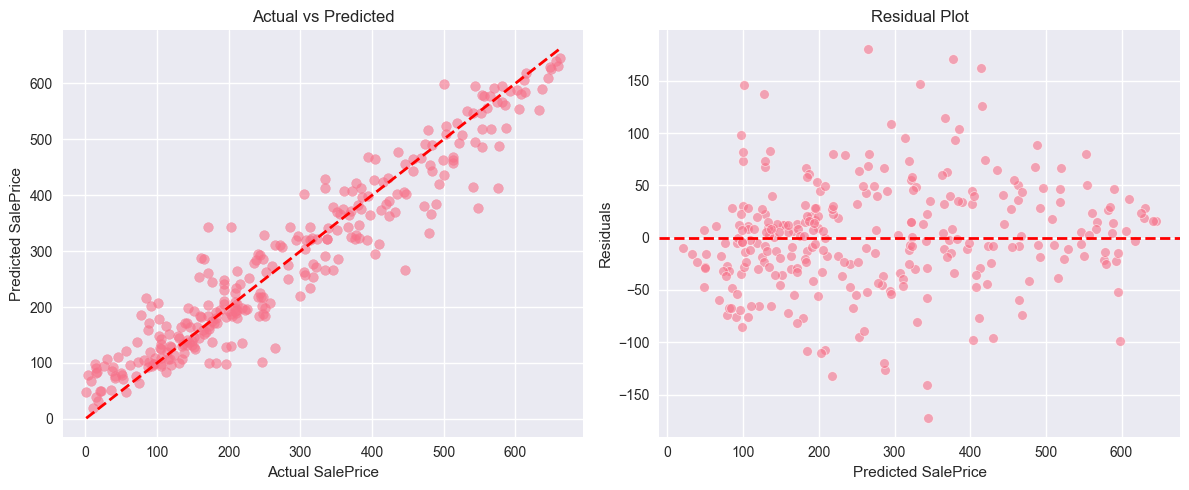

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted')

# Residual plot: Predicted vs Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


🔹 Top 10 Most Important Features:
        feature  importance
0            Id    0.039611
4       LotArea    0.039357
44    GrLivArea    0.037201
41     1stFlrSF    0.036998
36  TotalBsmtSF    0.034135
60   GarageArea    0.034038
35    BsmtUnfSF    0.033784
3   LotFrontage    0.032288
57  GarageYrBlt    0.029710
18    YearBuilt    0.028630


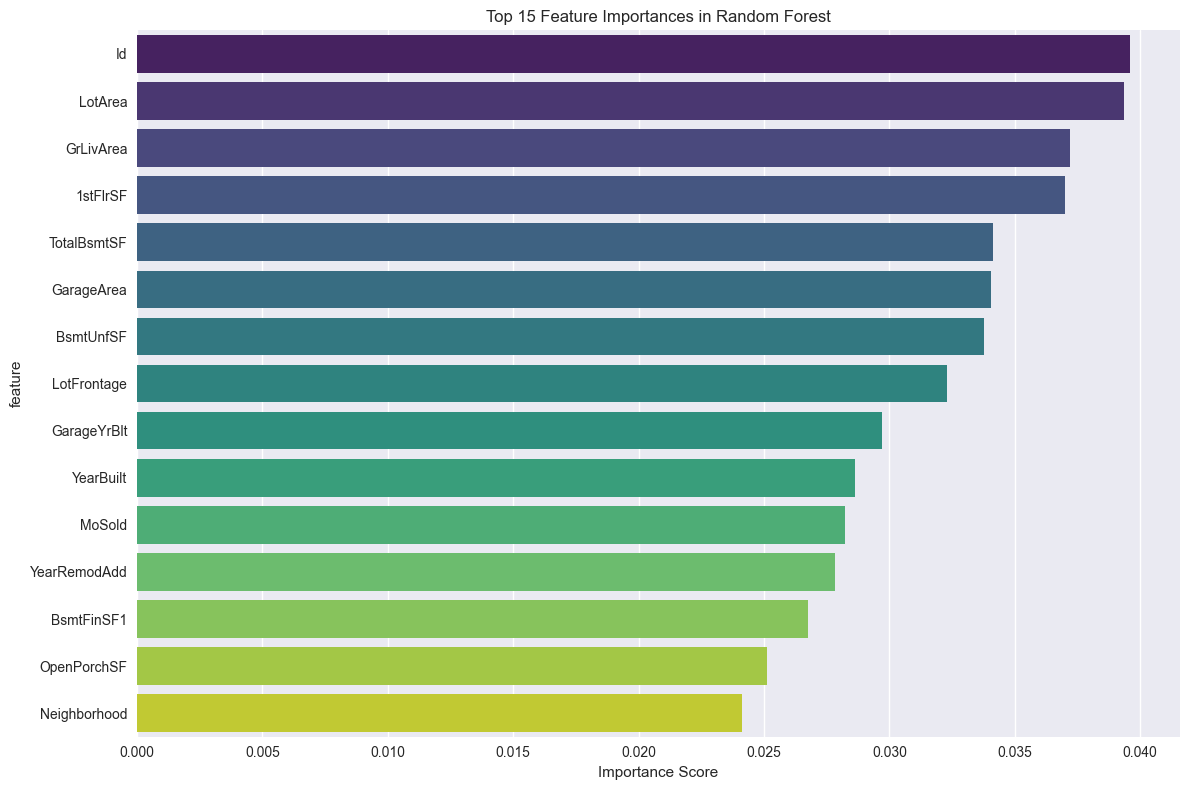

In [25]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("🔹 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("🔹 Starting Grid Search for hyperparameter tuning (Regression)...")
print("This may take a few minutes...")

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',  # Use R² for regression
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n🔹 Best Parameters: {grid_search.best_params_}")
print(f"🔹 Best Cross-validation R² Score: {grid_search.best_score_:.4f}")


🔹 Starting Grid Search for hyperparameter tuning (Regression)...
This may take a few minutes...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

🔹 Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
🔹 Best Cross-validation R² Score: 0.8827


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the best regressor
best_rf = grid_search.best_estimator_

# Make predictions on the test set
best_y_pred = best_rf.predict(X_test)

# Evaluate performance
train_r2 = best_rf.score(X_train, y_train)  # R² on training set
test_r2 = best_rf.score(X_test, y_test)    # R² on test set
mse = mean_squared_error(y_test, best_y_pred)
mae = mean_absolute_error(y_test, best_y_pred)

print("🔹 Optimized Model Performance (Regression):")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


🔹 Optimized Model Performance (Regression):
Training R²: 0.9841
Testing R²: 0.9121
Mean Squared Error (MSE): 2722.6154
Mean Absolute Error (MAE): 38.9171


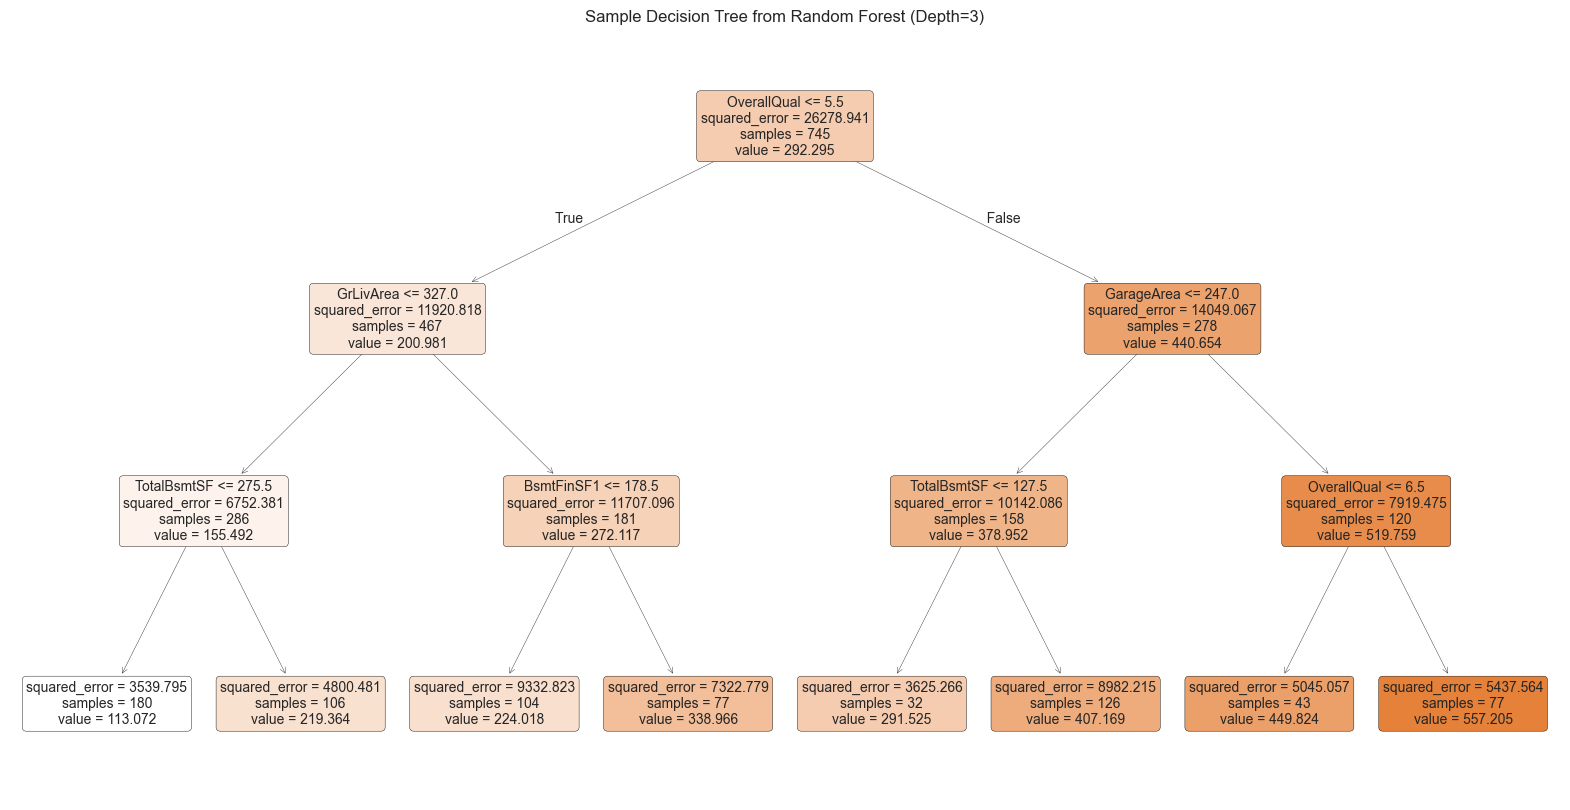

🔹 Note: This shows just one tree from the forest with limited depth for visualization purposes.
🔹 The actual Random Forest contains many deeper trees for better performance.


In [33]:
# Visualize one of the decision trees (limited depth for readability)
from sklearn.tree import plot_tree

# Create a smaller tree for visualization
small_rf = RandomForestRegressor(n_estimators=1, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(small_rf.estimators_[0], 
          feature_names=df.columns,
          class_names=df['SalePrice'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Sample Decision Tree from Random Forest (Depth=3)')
plt.show()

print("🔹 Note: This shows just one tree from the forest with limited depth for visualization purposes.")
print("🔹 The actual Random Forest contains many deeper trees for better performance.")